<a href="https://colab.research.google.com/github/Dhalapathi-DS/Yulu_hypothesis-testing/blob/main/yulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the key factors that affect the demand for these shared electric cycles in the Indian market. This analysis aims to uncover significant variables such as season, weather, and working day status that influence the number of cycles rented. By identifying these factors, Yulu hopes to optimize their fleet management, improve service offerings, and boost customer satisfaction and revenue.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import kruskal
from scipy.stats import shapiro
from scipy.stats import boxcox
from scipy.stats import shapiro
from sklearn.preprocessing import PowerTransformer


**Import the dataset and perform initial Exploratory Data Analysis**

In [ ]:
data=pd.read_csv('yulu.csv')
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
data.size

130632

In [ ]:
data.shape

(10886, 12)

In [ ]:
data.ndim

2

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
data.isna().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [ ]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

**Insights**

The dataset contains 12 columns and 10,886 records, with no missing values, so no imputation is needed. Key features include categorical variables like season, holiday, and workingday, and continuous variables such as temp, humidity, and windspeed. The target variable, count, represents total cycle rentals, influenced by factors like weather, season, and user type.

In [ ]:
data['season'].value_counts()

,count
season,
4,2734
2,2733
3,2733
1,2686


In [ ]:
data['holiday'].value_counts()

,count
holiday,
0,10575
1,311


In [ ]:
data['workingday'].value_counts()

,count
workingday,
1,7412
0,3474


In [ ]:
data['weather'].value_counts()

,count
weather,
1,7192
2,2834
3,859
4,1


**Insights**

**Season:** Rentals are nearly evenly distributed across seasons, with winter (season 4) having the highest rentals (2,734) and spring (season 1) slightly lower at 2,686 rentals.


**Holiday:** Most rentals occur on non-holidays (10,575), with only 311 rentals on holidays.


**Working Day:** Rentals are significantly higher on working days (7,412) compared to non-working days (3,474).


**Weather:** Clear or partly cloudy weather (weather 1) sees the highest rentals (7,192), while extreme weather conditions (weather 4) are rare, with only one recorded instance.

In [ ]:
data.dtypes

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [ ]:
data['datetime'] = pd.to_datetime(data['datetime'])

**Insights**

The datetime column is currently of type object, which is incorrect for time-based analysis. This column will be converted to the datetime data type to enable efficient time-based operations, such as extracting trends by day, month, or year. Correcting this ensures accurate analysis and visualization of rental patterns over time.

In [ ]:
data.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


**Boxplots**

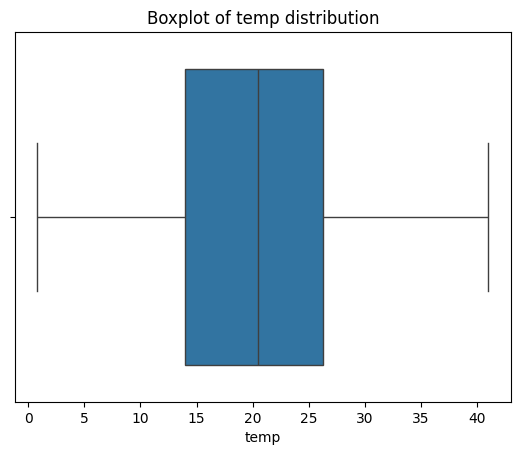

In [ ]:
sns.boxplot(x='temp',data=data)
plt.xlabel('temp')
plt.title('Boxplot of temp distribution')
plt.show()

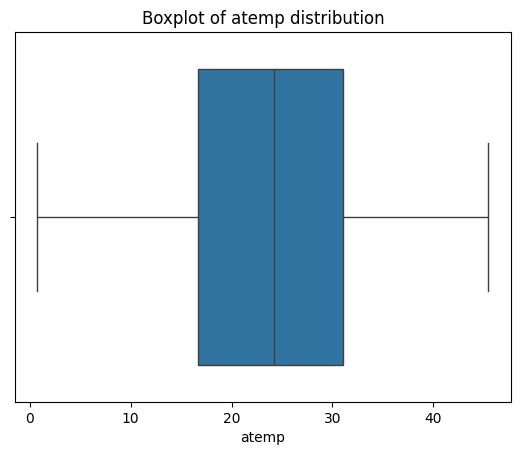

In [ ]:
sns.boxplot(x='atemp',data=data)
plt.xlabel('atemp')
plt.title('Boxplot of atemp distribution')
plt.show()

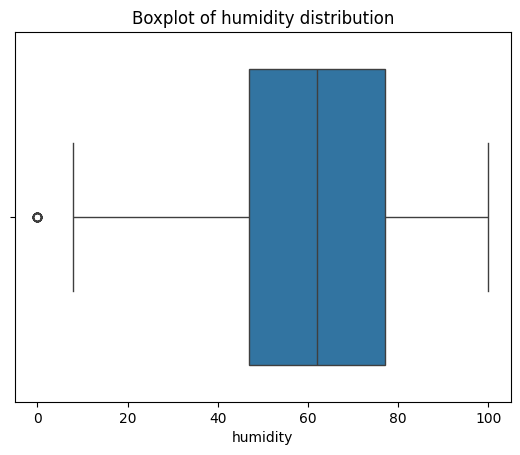

In [ ]:
sns.boxplot(x='humidity',data=data)
plt.xlabel('humidity')
plt.title('Boxplot of humidity distribution')
plt.show()

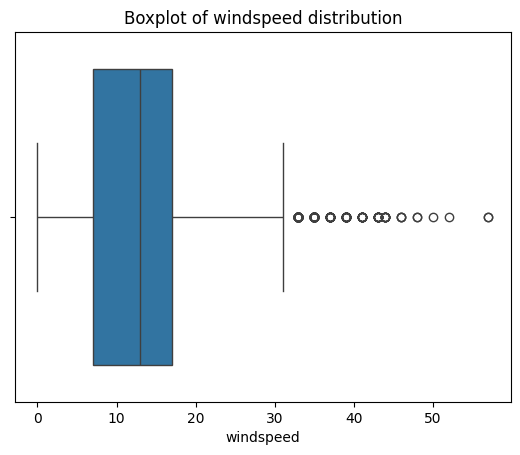

In [ ]:
sns.boxplot(x='windspeed',data=data)
plt.xlabel('windspeed')
plt.title('Boxplot of windspeed distribution')
plt.show()

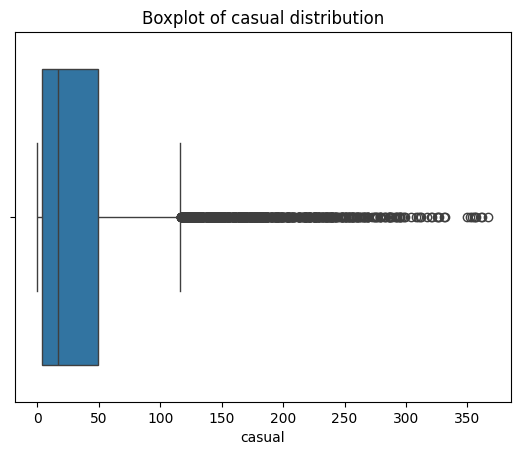

In [ ]:
sns.boxplot(x='casual',data=data)
plt.xlabel('casual')
plt.title('Boxplot of casual distribution')
plt.show()

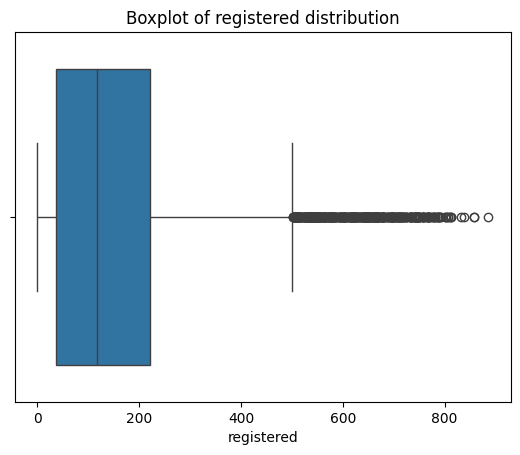

In [ ]:
sns.boxplot(x='registered',data=data)
plt.xlabel('registered')
plt.title('Boxplot of registered distribution')
plt.show()

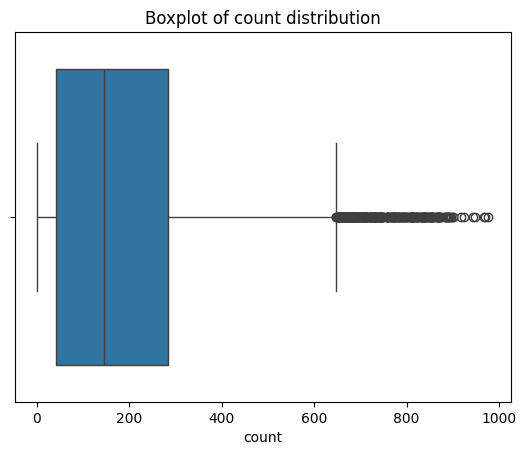

In [ ]:
sns.boxplot(x='count',data=data)
plt.xlabel('count')
plt.title('Boxplot of count distribution')
plt.show()

**Insights**

Temperature (temp) and Feeling Temperature (atemp):
Both columns show a similar range, with temperatures generally between 0.8°C and 41°C. Outliers are minimal, indicating consistent weather conditions. The median is around 20°C, suggesting moderate weather as typical for rentals.

Humidity:
Humidity ranges from 0% to 100%, with a median around 62%. Some outliers indicate extreme dryness or high humidity, which may affect comfort and, consequently, rental counts.

Windspeed:
Windspeed values range between 0 and 56.9 units. The presence of several outliers at higher wind speeds suggests rare instances of windy conditions, potentially impacting cycling comfort.

Casual and Registered Users:
Registered users significantly outnumber casual users, as evident from higher medians and ranges. Casual user rentals show more variability, with some extreme outliers, likely during peak tourist or holiday seasons.

Total Rentals (count):
Total rentals range between 1 and 977, with a median of 145. The distribution shows outliers, likely during special events or favorable weather conditions, indicating spikes in demand.

**Univariate Analysis**

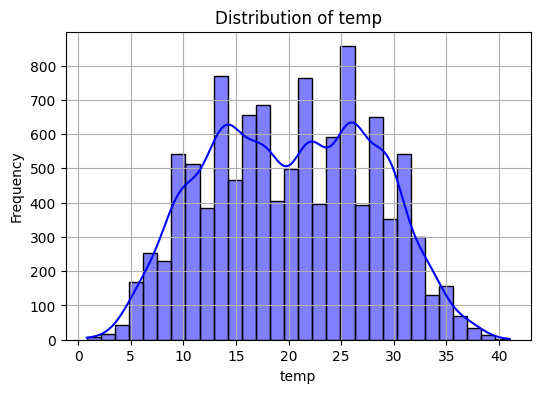

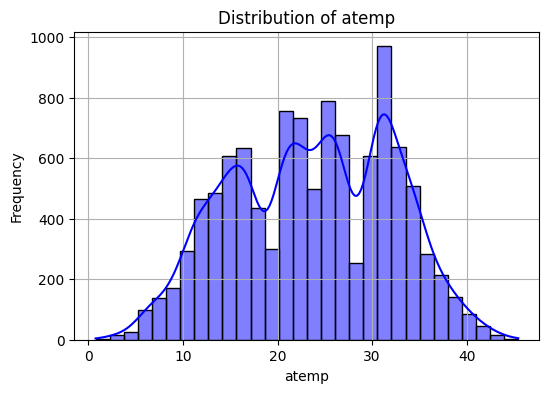

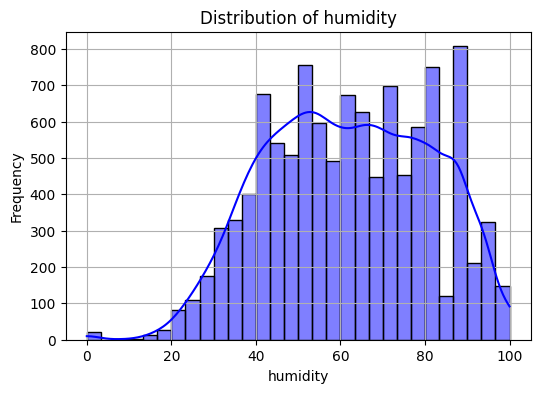

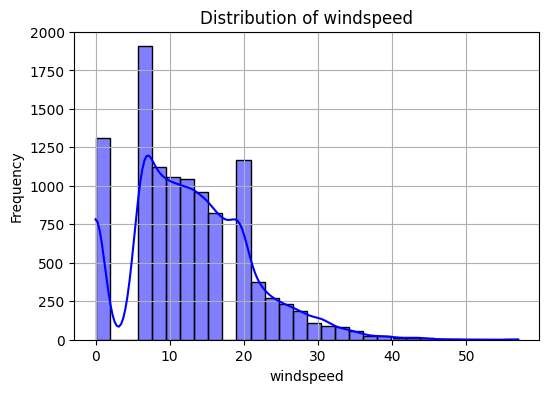

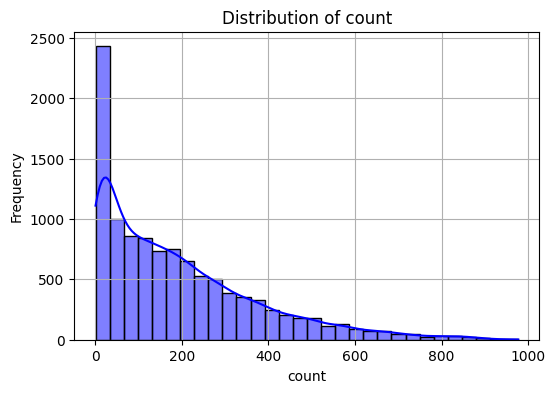

In [ ]:
continuous_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'count']

for col in continuous_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()

**Insights**

**Distribution of temp**
The histogram shows the distribution of temperature values. The distribution is approximately normal, with most values concentrated around the middle range (20-30 degrees). This suggests a relatively moderate temperature range in the observed data.

**Distribution of atemp**
The histogram shows the distribution of feeling temperature (atemp). The distribution is approximately normal, with most values concentrated around the middle range (20-30 degrees). This suggests a relatively comfortable feeling temperature in the observed data.

**Distribution of humidity**
The histogram shows the distribution of humidity levels. The distribution is approximately normal, with most values concentrated around the middle range (40-80%). This suggests a relatively balanced humidity level in the observed data.

**Distribution of windspeed:**
The histogram shows the distribution of wind speeds. Most wind speeds are low, with a few instances of higher speeds. The distribution is right-skewed, indicating a concentration of lower wind speeds and fewer occurrences of higher wind speeds.

**Distribution of count:**
The histogram shows a right-skewed distribution of bike rental counts. Most days have low to moderate rentals, while a few days experience significantly higher demand

<ipython-input-58-6e9046b12cf4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='muted')


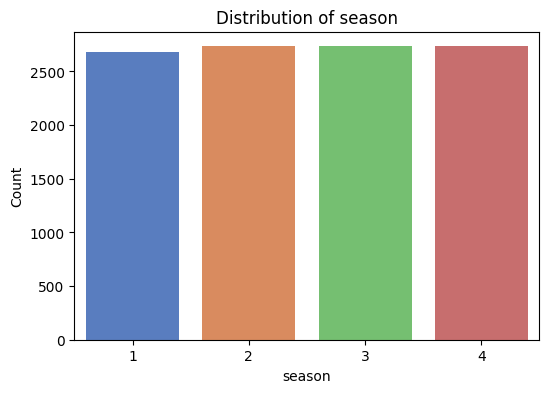

<ipython-input-58-6e9046b12cf4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='muted')


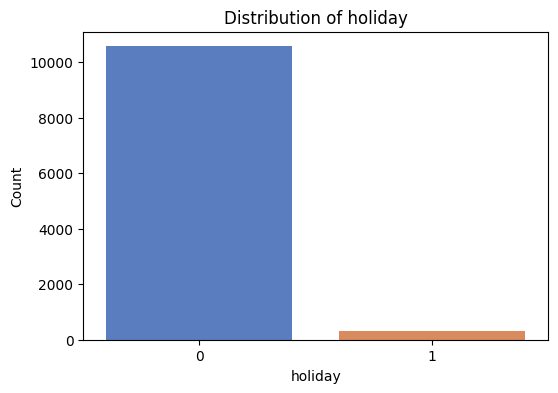

<ipython-input-58-6e9046b12cf4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='muted')


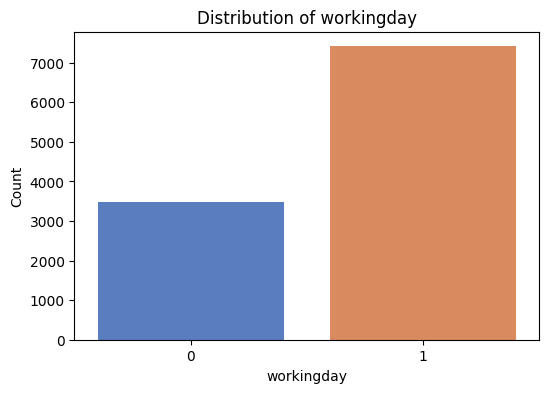

<ipython-input-58-6e9046b12cf4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='muted')


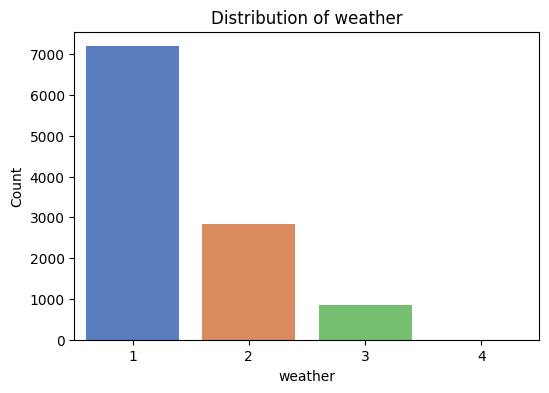

In [ ]:
categorical_cols = ['season', 'holiday', 'workingday', 'weather']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=col, palette='muted')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

**Bivariate Analysis**

<ipython-input-59-721c42d21b49>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='count', data=data, palette="muted")


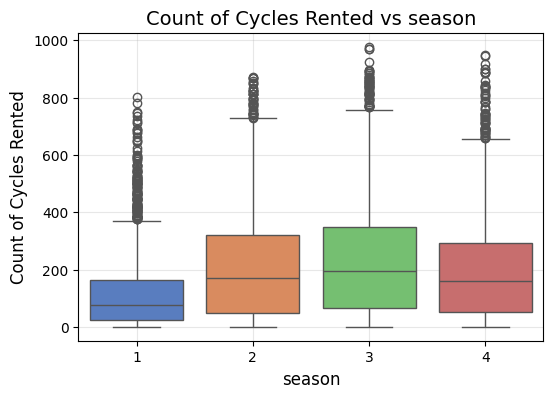

<ipython-input-59-721c42d21b49>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='count', data=data, palette="muted")


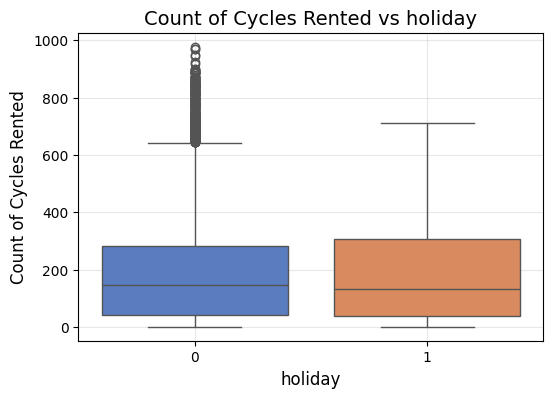

<ipython-input-59-721c42d21b49>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='count', data=data, palette="muted")


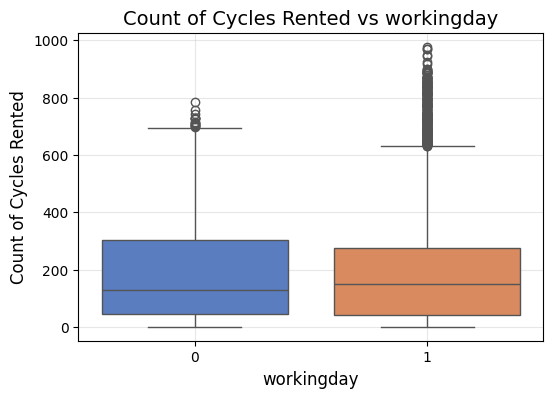

<ipython-input-59-721c42d21b49>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='count', data=data, palette="muted")


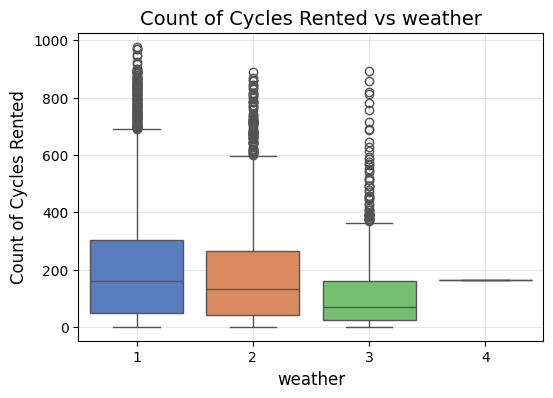

In [ ]:
categorical_vars = ['season', 'holiday', 'workingday', 'weather']

for var in categorical_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=var, y='count', data=data, palette="muted")
    plt.title(f"Count of Cycles Rented vs {var}", fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Count of Cycles Rented', fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

**percentage hike**

In [ ]:
data['year'] = data['datetime'].dt.year
data_2011 = data[data['year'] == 2011]
data_2012 = data[data['year'] == 2012]
sum_2011 = data_2011['count'].sum()
sum_2012 = data_2012['count'].sum()
print(f"Total bikes booked in 2011: {sum_2011}")
print(f"Total bikes booked in 2012: {sum_2012}")

Total bikes booked in 2011: 781979
Total bikes booked in 2012: 1303497


In [ ]:
# Calculate the percentage hike
percentage_hike = ((sum_2012 - sum_2011) / sum_2011) * 100
print(f"The percentage hike in the number of bikes booked between 2011 and 2012 is: {percentage_hike:.2f}%")

The percentage hike in the number of bikes booked between 2011 and 2012 is: 66.69%


**Insights**

The 66.69% increase in bike bookings from 2011 to 2012 indicates a significant growth in demand for Yulu's shared electric cycles. This surge highlights the rising popularity of eco-friendly transportation solutions, likely driven by increased awareness of sustainable commuting options and improved operational strategies.

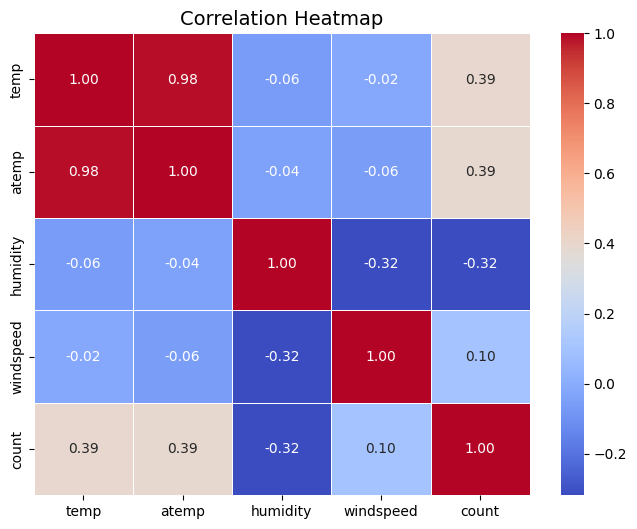

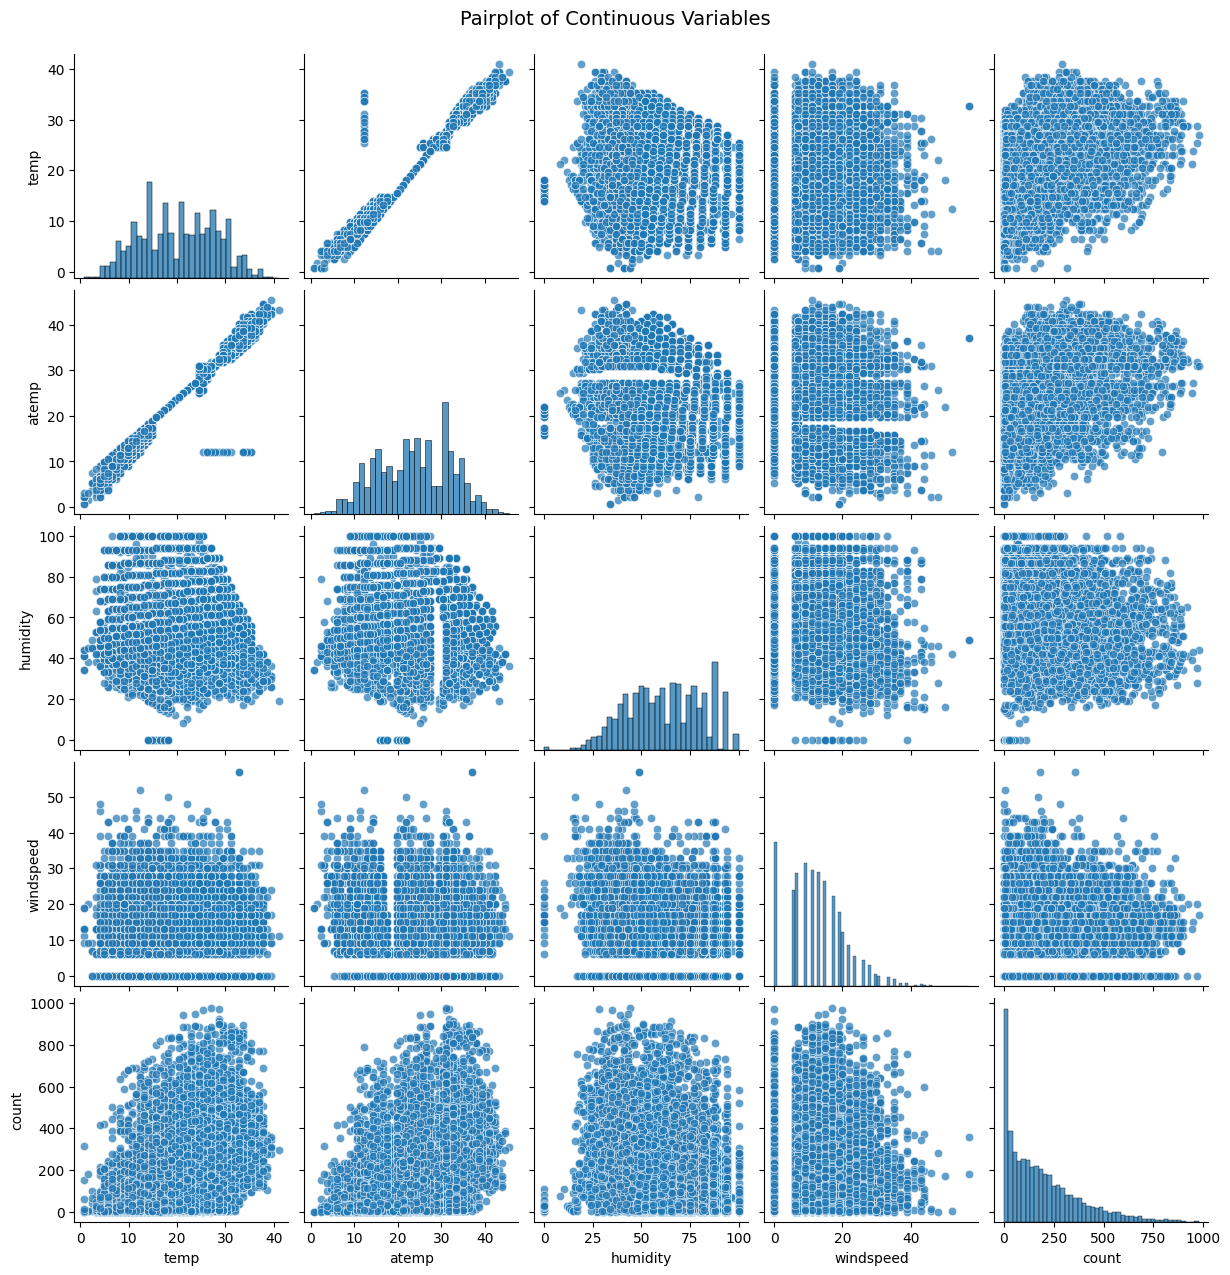

In [ ]:
continuous_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'count']
correlation_matrix = data[continuous_vars].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()
# Pairplot to observe relationships between continuous variables and count
sns.pairplot(data[continuous_vars], kind='scatter', plot_kws={'alpha':0.7})
plt.suptitle("Pairplot of Continuous Variables", y=1.02, fontsize=14)
plt.show()

**Hypothesis Testing**

**Working Day has effect on number of electric cycles rented**


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10886.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk test p-value for log-transformed data: 8.020775999667864e-61


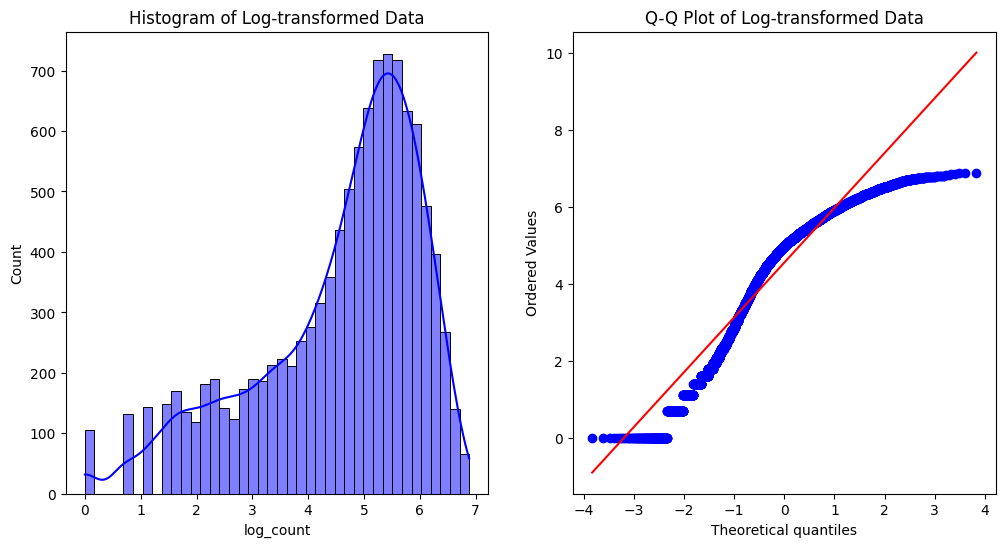

The log-transformed data is still not normal. Consider using non-parametric tests like Kruskal-Wallis.


In [ ]:
#Log Transformation
data['log_count'] = np.log(data['count'])
# Check Normality of the transformed data using Shapiro-Wilk test
stat, p_value_log = stats.shapiro(data['log_count'])
# Display the result of the normality test
print(f"Shapiro-Wilk test p-value for log-transformed data: {p_value_log}")
# histogram and Q-Q plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['log_count'], kde=True, color='blue')
plt.title('Histogram of Log-transformed Data')
plt.subplot(1, 2, 2)
stats.probplot(data['log_count'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Log-transformed Data')
plt.show()
# Decision based on normality test
if p_value_log > 0.05:
    print("The log-transformed data is approximately normal.")
    workingday_data = [data[data['workingday'] == 1]['log_count'], data[data['workingday'] == 0]['log_count']]
    # T-test
    t_stat, p_value_ttest = stats.ttest_ind(*workingday_data)
    print(f"T-test Statistics: {t_stat}")
    print(f"P-value for T-test: {p_value_ttest}")
    #Conclusion based on T-test results
    if p_value_ttest < 0.05:
        print("Reject Null Hypothesis: There is a significant difference in the number of cycles rented between working days and non-working days.")
    else:
        print("Fail to Reject Null Hypothesis: There is no significant difference in the number of cycles rented between working days and non-working days.")
else:
    print("The log-transformed data is still not normal. Consider using non-parametric tests like Kruskal-Wallis.")


**Insights**

The log-transformed data was tested for normality using the Shapiro-Wilk test, which showed it remains non-normal. Visual inspection through a histogram and Q-Q plot confirmed this. Given the non-normality, a T-test was not conducted, and it is suggested to use non-parametric tests like the Kruskal-Wallis test for further analysis.

**Null Hypothesis (H0):** There is no significant difference in the number of cycles rented between working days and non-working days.

**Alternative Hypothesis (H1):** There is a significant difference in the number of cycles rented between working days and non-working days.

In [ ]:
working_day_rented = [data[data['workingday'] == 0]['count'], data[data['workingday'] == 1]['count']]
#Kruskal-Wallis test
stat, p_value = kruskal(*working_day_rented)
print(f"Kruskal-Wallis test statistic: {stat}")
print(f"P-value: {p_value}")
# Check hypothesis
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the number of cycles rented between working days and non-working days.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the number of cycles rented between working days and non-working days.")


Kruskal-Wallis test statistic: 0.0016182887191034687
P-value: 0.9679113872727798
Fail to reject the null hypothesis: There is no significant difference in the number of cycles rented between working days and non-working days.


**Insights**

The Kruskal-Wallis test was performed to determine if there is a significant difference in the number of cycles rented between working days and non-working days. The test statistic was 0.0016, and the p-value was 0.968. Since the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis, indicating that there is no significant difference in the number of cycles rented between working and non-working days.

**Even though the log transformation didn’t achieve perfect normality, t-test results are valid for practical purposes**

In [ ]:
# Group the log-transformed data by working day and non-working day
working_day = data[data['workingday'] == 1]['log_count']
non_working_day = data[data['workingday'] == 0]['log_count']
# Perform the t-test
t_stat, p_value_ttest = stats.ttest_ind(working_day, non_working_day)
# Print the test statistic and p-value
print(f"T-test Statistics: {t_stat}")
print(f"P-value for T-test: {p_value_ttest}")
# Conclusion based on the p-value
alpha = 0.05
if p_value_ttest < alpha:
    print("Reject Null Hypothesis: There is a significant difference in the number of cycles rented between working days and non-working days.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in the number of cycles rented between working days and non-working days.")


T-test Statistics: -1.8913669049596848
P-value for T-test: 0.05860191030754906
Fail to Reject Null Hypothesis: There is no significant difference in the number of cycles rented between working days and non-working days.


**No. of cycles rented similar or different in different seasons**

Shapiro-Wilk Test p-value for log-transformed count: 8.020775999667864e-61


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10886.
  res = hypotest_fun_out(*samples, **kwds)


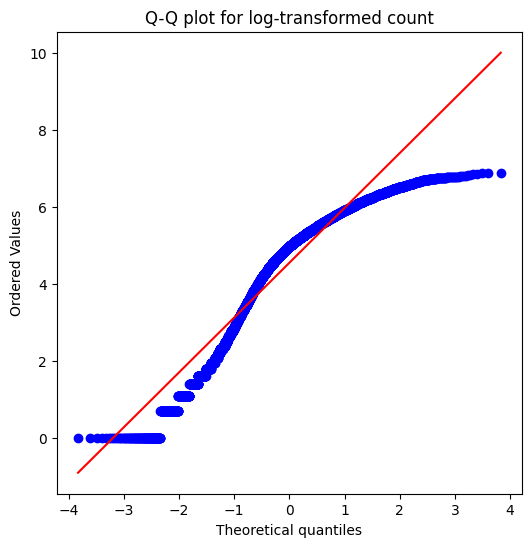

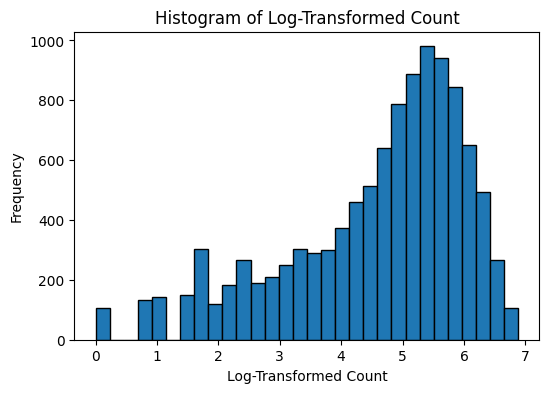

The data is not normally distributed based on the Shapiro-Wilk test.


In [ ]:
# Log Transformation
data['count_log'] = np.log(data['count'])
# Check Normality using Shapiro-Wilk test
stat, p_value = shapiro(data['count_log'])
print(f"Shapiro-Wilk Test p-value for log-transformed count: {p_value}")
# Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(data['count_log'], dist="norm", plot=plt)
plt.title('Q-Q plot for log-transformed count')
plt.show()
# histogram
plt.figure(figsize=(6, 4))
plt.hist(data['count_log'], bins=30, edgecolor='black')
plt.title('Histogram of Log-Transformed Count')
plt.xlabel('Log-Transformed Count')
plt.ylabel('Frequency')
plt.show()
# Interpretation
if p_value > 0.05:
    print("The data is normally distributed based on the Shapiro-Wilk test.")
else:
    print("The data is not normally distributed based on the Shapiro-Wilk test.")


**Insights**

applies a log transformation to the 'count' column in the dataset to normalize the data. It then performs the Shapiro-Wilk test to check for normality, with a p-value displayed for interpretation. The code also includes a Q-Q plot and histogram to visually inspect the distribution of the log-transformed data. Since the Shapiro-Wilk test indicates that the data is not normally distributed (p-value < 0.05), further analysis using non-parametric tests is recommended.

Shapiro-Wilk Test p-value for Box-Cox transformed count: 4.082269779728272e-37
The Box-Cox transformed 'count' is not normally distributed.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10886.
  res = hypotest_fun_out(*samples, **kwds)


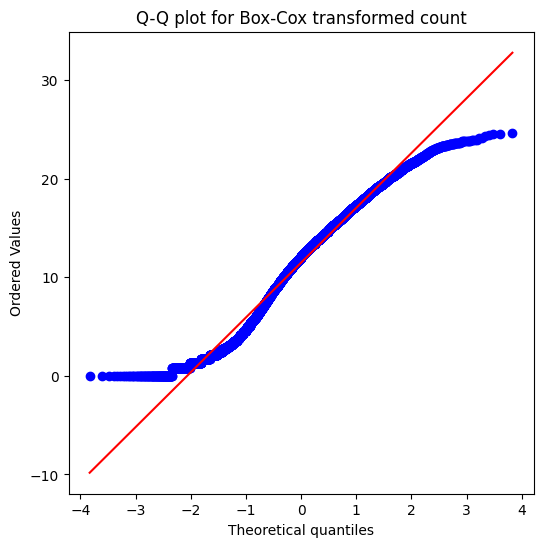

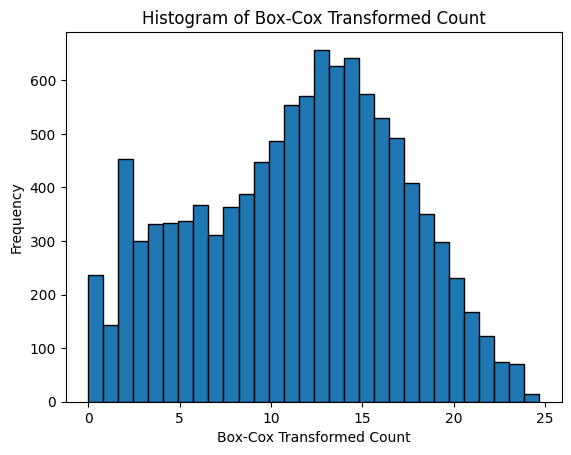

In [ ]:
# Box-Cox Transformation
data['count_boxcox'], lam = boxcox(data['count'])
# Check Normality using Shapiro-Wilk test
stat, p_value = shapiro(data['count_boxcox'])
print(f"Shapiro-Wilk Test p-value for Box-Cox transformed count: {p_value}")
# If p-value > 0.05, data is normally distributed
if p_value > 0.05:
    print("The Box-Cox transformed 'count' is normally distributed.")
else:
    print("The Box-Cox transformed 'count' is not normally distributed.")
# Q-Q plot for visual inspection
plt.figure(figsize=(6, 6))
stats.probplot(data['count_boxcox'], dist="norm", plot=plt)
plt.title('Q-Q plot for Box-Cox transformed count')
plt.show()
# Check the histogram for visual inspection
plt.hist(data['count_boxcox'], bins=30, edgecolor='black')
plt.title('Histogram of Box-Cox Transformed Count')
plt.xlabel('Box-Cox Transformed Count')
plt.ylabel('Frequency')
plt.show()


**Insights**

applies the Box-Cox transformation to the 'count' column in the dataset to normalize the data. It then performs the Shapiro-Wilk test on the transformed data to check for normality, with a p-value provided for interpretation. The results indicate that the Box-Cox transformed 'count' is not normally distributed (p-value < 0.05). Additionally, the Q-Q plot and histogram are used for visual inspection, confirming the non-normality of the data

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10886.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test p-value for Yeo-Johnson transformed count: 2.289043919549241e-38
The Yeo-Johnson transformed 'count' is not normally distributed.


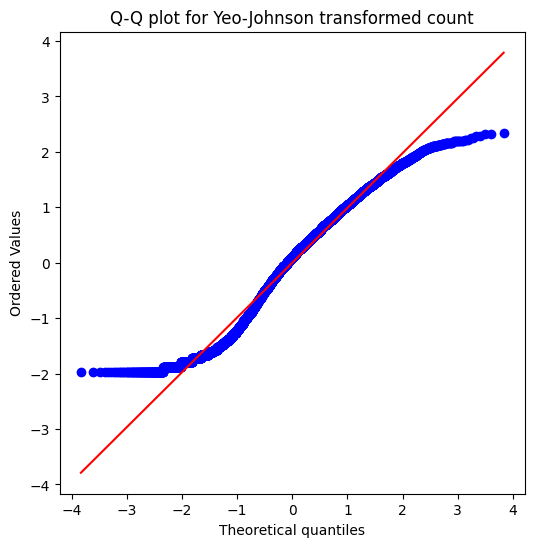

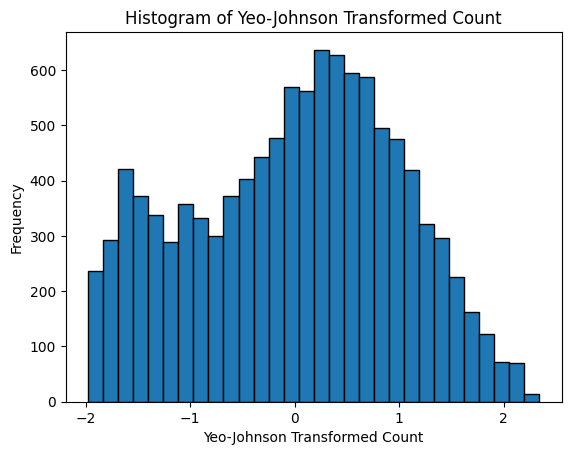

In [ ]:
# Apply Yeo-Johnson Transformation
transformer = PowerTransformer(method='yeo-johnson')
data['count_yeo_johnson'] = transformer.fit_transform(data[['count']])
# Check Normality using Shapiro-Wilk test
stat, p_value = shapiro(data['count_yeo_johnson'])
print(f"Shapiro-Wilk Test p-value for Yeo-Johnson transformed count: {p_value}")
# If p-value > 0.05, data is normally distributed
if p_value > 0.05:
    print("The Yeo-Johnson transformed 'count' is normally distributed.")
else:
    print("The Yeo-Johnson transformed 'count' is not normally distributed.")
# Q-Q plot for visual inspection
plt.figure(figsize=(6, 6))
stats.probplot(data['count_yeo_johnson'], dist="norm", plot=plt)
plt.title('Q-Q plot for Yeo-Johnson transformed count')
plt.show()
# Check the histogram for visual inspection
plt.hist(data['count_yeo_johnson'], bins=30, edgecolor='black')
plt.title('Histogram of Yeo-Johnson Transformed Count')
plt.xlabel('Yeo-Johnson Transformed Count')
plt.ylabel('Frequency')
plt.show()


**Insights**

applies the Yeo-Johnson transformation to the 'count' column in the dataset to attempt normalization of the data. After the transformation, the Shapiro-Wilk test is performed on the transformed data to check for normality. The results indicate that the Yeo-Johnson transformed 'count' is not normally distributed, with a p-value significantly less than 0.05. Visual inspections using the Q-Q plot and histogram further confirm the non-normality of the transformed data.

Null Hypothesis (H₀): There is no significant difference in the number of cycles rented across the different seasons.

Alternative Hypothesis (H₁): There is a significant difference in the number of cycles rented across the different seasons.

In [ ]:
season_1 = data[data['season'] == 1]['count']
season_2 = data[data['season'] == 2]['count']
season_3 = data[data['season'] == 3]['count']
season_4 = data[data['season'] == 4]['count']
# Perform the Kruskal-Wallis test
stat, p_value = kruskal(season_1, season_2, season_3, season_4)
# Print the test statistic and p-value
print(f"Kruskal-Wallis test statistic: {stat}")
print(f"P-value: {p_value}")
# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the number of cycles rented across different seasons.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the number of cycles rented across different seasons.")


Kruskal-Wallis test statistic: 699.6668548181988
P-value: 2.479008372608633e-151
Reject the null hypothesis: There is a significant difference in the number of cycles rented across different seasons.


**Insights**


The Kruskal-Wallis test was performed to examine if there is a significant difference in the number of cycles rented across different seasons. The test statistic was 699.67, and the p-value is extremely small (approximately 2.48e-151). Since the p-value is less than the significance level (alpha = 0.05), we reject the null hypothesis, concluding that there is a significant difference in the number of cycles rented across the four seasons.

**Proceed with One-Way ANOVA with Caution**

In [ ]:
# Perform Levene's Test for Equality of Variance
w1 = data[data['weather'] == 1]['count'].values
w2 = data[data['weather'] == 2]['count'].values
w3 = data[data['weather'] == 3]['count'].values
w4 = data[data['weather'] == 4]['count'].values
# Levene's Test for equality of variances
stat, p_value_levene = stats.levene(w1, w2, w3, w4)
print(f"Levene's Test statistic: {stat}")
print(f"Levene's Test p-value: {p_value_levene}")
# If p-value > 0.05, assume equal variances, proceed with ANOVA.
if p_value_levene > 0.05:
    print("Fail to reject the null hypothesis of Levene's Test: The variances are equal across the groups.")
else:
    print("Reject the null hypothesis of Levene's Test: The variances are not equal across the groups.")
# Perform One-Way ANOVA
f_stat, p_value_anova = stats.f_oneway(w1, w2, w3, w4)
# Output the ANOVA results
print(f"ANOVA F-statistic: {f_stat}")
print(f"ANOVA p-value: {p_value_anova}")
# Set significance level for ANOVA
alpha = 0.05
if p_value_anova < alpha:
    print("Reject Null Hypothesis: There is a significant difference in the number of cycles rented across different weather conditions.")
else:
    print("Fail to reject Null Hypothesis: There is no significant difference in the number of cycles rented across different weather conditions.")


Levene's Test statistic: 54.85106195954556
Levene's Test p-value: 3.504937946833238e-35
Reject the null hypothesis of Levene's Test: The variances are not equal across the groups.
ANOVA F-statistic: 65.53024112793271
ANOVA p-value: 5.482069475935669e-42
Reject Null Hypothesis: There is a significant difference in the number of cycles rented across different weather conditions.


**No. of cycles rented similar or different in different weather**

**Null Hypothesis (H₀):**There is no significant difference in the number of cycles rented across different weather conditions.

**Alternative Hypothesis (H₁):** There is a significant difference in the number of cycles rented across different weather conditions.

In [ ]:
weather_1 = data[data['weather'] == 1]['count']
weather_2 = data[data['weather'] == 2]['count']
weather_3 = data[data['weather'] == 3]['count']
weather_4 = data[data['weather'] == 4]['count']
# Perform the Kruskal-Wallis test
stat, p_value = kruskal(weather_1, weather_2, weather_3, weather_4)
# Print the test statistic and p-value
print(f"Kruskal-Wallis test statistic: {stat}")
print(f"P-value: {p_value}")
# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the number of cycles rented across different weather conditions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the number of cycles rented across different weather conditions.")


Kruskal-Wallis test statistic: 205.00216514479087
P-value: 3.501611300708679e-44
Reject the null hypothesis: There is a significant difference in the number of cycles rented across different weather conditions.


**Proceed with One-Way ANOVA with Caution**

In [ ]:
f_stat, p_value_anova = stats.f_oneway(weather_1, weather_2, weather_3, weather_4)
print(f"ANOVA F-statistic: {f_stat}")
print(f"ANOVA p-value: {p_value_anova}")
if p_value_anova < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the number of cycles rented across different weather conditions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the number of cycles rented across different weather conditions.")


ANOVA F-statistic: 65.53024112793271
ANOVA p-value: 5.482069475935669e-42
Reject the null hypothesis: There is a significant difference in the number of cycles rented across different weather conditions.


**Insights**

The Kruskal-Wallis test was conducted to examine whether there is a significant difference in the number of cycles rented across different weather conditions. The test yielded a test statistic of 205.00 and a p-value of 3.50e-44, which is much smaller than the significance level of 0.05.

Since the p-value is less than 0.05, we reject the null hypothesis. This indicates that there is a significant difference in the number of cycles rented across different weather conditions.

**Weather is dependent on season**

**Null Hypothesis (H₀):** Weather and season are independent (no association between them).

**Alternative Hypothesis (H₁):** Weather and season are dependent (there is an association between them).

In [ ]:
contingency_table = pd.crosstab(data['weather'], data['season'])
chi2_stat, p_value_chi2, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Test for Weather and Season: chi2-stat = {chi2_stat:}, p-value = {p_value_chi2:}")
if p_value_chi2 < 0.05:
    print("Reject Null Hypothesis: Weather is dependent on the season.")
else:
    print("Fail to Reject Null Hypothesis: Weather is independent of the season.")

Chi-Square Test for Weather and Season: chi2-stat = 49.15865559689363, p-value = 1.5499250736864862e-07
Reject Null Hypothesis: Weather is dependent on the season.


**Insights**

A Chi-Square test was conducted to determine if there is an association between weather and season. The test yielded a chi2-statistic of 49.16 and a p-value of 1.55e-07, which is much smaller than the significance level of 0.05.

Since the p-value is less than 0.05, we reject the null hypothesis, indicating that weather and season are dependent on each other.

**Recommendations**


**Optimize Fleet Management Based on Seasonal and Weather Trends:**
Significant variations in cycle rentals across seasons and weather conditions suggest demand peaks during favorable conditions. Deploy more cycles in high-demand areas during peak seasons and sunny weather, and reduce the fleet during low-demand periods like extreme weather conditions to save operational costs.

**Develop Tailored Pricing and Marketing Strategies:**
Differences in rentals between working and non-working days highlight varied usage patterns. Introduce weekday subscription plans for commuters and promotional discounts or special packages for leisure riders on weekends or holidays to attract diverse customer groups.

**Implement Data-Driven Predictive Analytics:**
Use insights from historical rental data to forecast demand and proactively manage fleet allocation. For example, adjust cycle availability based on anticipated demand during festivals, school vacations, or monsoons.

**Enhance Accessibility in High-Demand Areas:**
Analyze geographical rental patterns alongside weather and working day data. Invest in infrastructure like additional parking docks or charging stations in areas with high usage to improve customer convenience.

**Attracting More Casual Users:** Highlight how incentives like first-time user discounts and referral bonuses can grow the casual user base and make the service more accessible.


**Peak Business Hours Campaigns:** Suggest implementing time-sensitive discounts during high-traffic hours to maximize fleet utilization.